In [1]:
import urllib.request 
import nltk
#nltk.download('averaged_perceptron_tagger')


In [2]:
# List of POS tags and their meaning: https://stackoverflow.com/questions/15388831/what-are-all-possible-pos-tags-of-nltk
nltk.pos_tag(nltk.word_tokenize('She ran quickly and won'))

[('She', 'PRP'),
 ('ran', 'VBD'),
 ('quickly', 'RB'),
 ('and', 'CC'),
 ('won', 'VBD')]

In [3]:
%%time
# https://huggingface.co/Helsinki-NLP/opus-mt-en-he
from transformers import pipeline
pipe = pipeline("translation", model="Helsinki-NLP/opus-mt-en-he")
print(pipe("Alice in the wonderland is a wonderful book"))


[{'translation_text': 'אליס בארץ הפלאות הוא ספר נפלא'}]
CPU times: total: 12.4 s
Wall time: 14.8 s


In [ ]:
alice_http_response = urllib.request.urlopen('https://www.cs.cmu.edu/~rgs/alice-I.html')
alice_line_by_line = [line.decode('utf-8') for line in alice_http_response]


In [ ]:
alice_line_by_line[0:20]

# Solutions


### 1. Clean the text as much as you can 


In [78]:
import re

alice_clean = [re.sub('<.+?>', '', line) for line in alice_line_by_line]
# note that unlike + which is a gready qualifier 
# +? is a lazy qualifier that stops after the first match
alice_clean = [re.sub('\n', '', line) for line in alice_clean]
alice_clean = [re.sub('^\s+', '', line) for line in alice_clean]
alice_clean = [re.sub('\*.+\*', '', line) for line in alice_clean]
alice_clean = [line for line in alice_clean if len(line)>0]

alice_single_text = ' '.join(alice_clean)

In [80]:
alice_single_text[0:500]

"Alice's Adventures in Wonderland -- Chapter I CHAPTER I Down the Rabbit-Hole Alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do:  once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, `and what is the use of a book,' thought Alice `without pictures or conversation?' So she was considering in her own mind (as well as she could, for the hot day made her feel very sleepy and stupid), whe"

### 2. How many times 'Alice' is mentioned 

In [81]:
alice_single_text.count('Alice')

31

### 3. How many verbs and nouns are there in the chapter?

In [93]:
tagged_words = nltk.pos_tag(nltk.word_tokenize(alice_single_text))
verbs = [word[0] for word in tagged_words if word[1].startswith('VB')]
nouns = [word[0] for word in tagged_words if word[1].startswith('NN')]

len(verbs), len(nouns)

(451, 369)

In [95]:
verbs[0:10]

['CHAPTER',
 'was',
 'beginning',
 'get',
 'sitting',
 'having',
 'do',
 'twice',
 'had',
 'peeped']

### 4. What is the most common verb?

In [96]:
from collections import Counter
Counter(verbs).most_common(10)

[('was', 53),
 ('had', 20),
 ('be', 13),
 ('think', 11),
 ('see', 10),
 ('were', 8),
 ('said', 8),
 ('get', 7),
 ('went', 7),
 ('found', 7)]

### 5. Build a wordcloud for the chpater

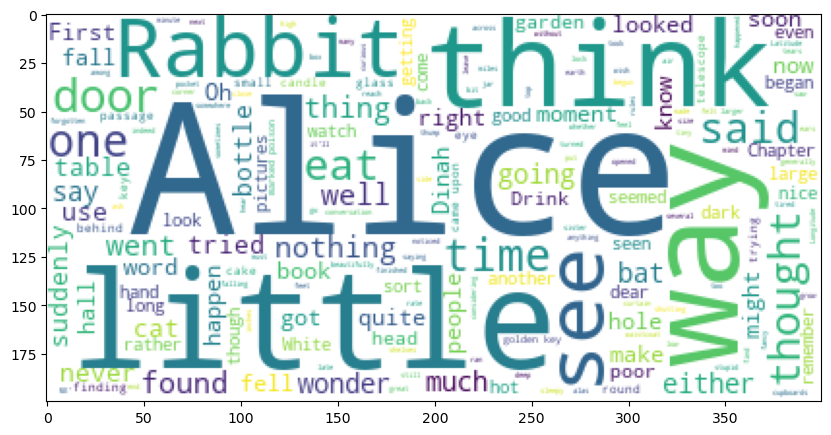

In [99]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(alice_single_text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.show()

### 6. Transalate the chapter to Hebrew

In [111]:
[pipe(line) for line in alice_clean[100:120]]

[[{'translation_text': 'תוהה איך היא הייתה אי פעם לצאת שוב.'}],
 [{'translation_text': 'לפתע היא נתקלה בשולחן קטן בעל שלוש רגליים, עשוי כולו'}],
 [{'translation_text': 'זכוכית מוצקה; לא היה שום דבר על זה מלבד מפתח זהב זעיר,'}],
 [{'translation_text': 'והמחשבה הראשונה של אליס הייתה שזה עשוי להיות שייך לאחד'}],
 [{'translation_text': 'דלתות האולם; אבל, אבוי! או המנעולים היו גדולים מדי, או'}],
 [{'translation_text': 'המפתח היה קטן מדי, אבל בכל מקרה זה לא יפתח אף אחד'}],
 [{'translation_text': 'בכל אופן, בסיבוב השני, היא נתקלה בשפל.'}],
 [{'translation_text': 'וילון שהיא לא שמה לב אליו לפני כן, ומאחוריו היה מעט'}],
 [{'translation_text': "דלת בגובה 15 אינצ'ים: היא ניסתה את מפתח הזהב הקטן"}],
 [{'translation_text': 'במנעול, ולתענוג הגדול שלה זה התאים!'}],
 [{'translation_text': 'אליס מוצאת דלת קטנה מאחורי הוילון.'}],
 [{'translation_text': 'אליס פתחה את הדלת וגילתה שהיא הובילה לקטנה'}],
 [{'translation_text': 'מעבר, לא הרבה יותר גדול מחור עכברוש: היא כרעה ברך'}],
 [{'translation_text': 'הסת